In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
import plotly
import plotly.graph_objs as go 
pio.renderers.default = "notebook_connected"
import matplotlib as mpl
import math
import matplotlib.colors as colors
import json
from PIL import Image

In [ ]:
import shapely.geometry as geo
from shapely.geos import TopologicalError
import matplotlib as mpl
import math
import matplotlib.colors as colors
import geopandas as gpd
from shapely.geometry import Point

# 13개의 산업과 14개의 지역으로 알아보는 제주 재난지원금 소비추이 분석

- **Chapter1** 월별 재난 지원금 소비 추이 파악
- **Chapter2** 각 산업별 재난 지원금 소비 추이 파악
- **Chapter3** 제주시/서귀포시 재난지원금 소비 추이 비교 분석
- **Chapter4** 산업별 재난 지원금 사용업소/미사용 업소 비율 분석

# 분석 결론

**Chapter1**<br>
- 월별로 재난지원금 소비 추이를 분석한 결과 5월의 재난지원금 사용 비율은 전체에서 <U>14.3%로 사용률이 가장 높았고</U> 월마다 평균 68.1%씩 줄어 8월에는 0.3%의 결제율을 보임<br><br> 
- 산업별 재난 지원금 1회 결제 시 소비 금액을 분석한 결과 <U>의류업에서 가장 큰 소비</U>를 보이는 것으로 나타났고 그 다음으로는 숙박업,  음식점업,  교육업순인 것으로 분석됨<br><br> 
- 산업별 재난 지원금 총 소비 금액을 분석한 결과 <U>음식점업에서 가장 많이 소비</U>한 것으로 나타났고 그다음으로는 소매업,  여가.문화.스포츠업 순인 것으로 분석됨<br><br> 

**Chapter2**<br>
- 재난 지원금을 가장 많이 사용한 상위 5개의 산업을 세분화하여 분석한 결과 **음식점업**  카테고리에 속해있는 업종의 재난 지원금 사용 비율은 <U>일반한식(58.4%), 서양음식(20.1%), 제과점(5.1%), 기타음료식품(4.5%), 일식회집(4.3%)</U> 순이였고,  **소매업**의 경우 <U>편의점(33.8%), 스넥(13.1%), 슈퍼마켓(12.6%), 농축수산품(12.6%), 스포츠레져용품(8.1%)</U>순이였으며,  **여가.문화.스포츠업**은 <U>미용원(44.4%), 기타레져업(14.2%), 피부미용실(9.1%), 노래방(6.8%), 당구장(6.6%)</U>, **기타 서비스업**은 <U>주유소(25.3%), 자동차 정비(17.9%), 세탁소(17.1%), 가정용품수리(8.1%), 렌트카(6.7%)</U>순이였으며, 마지막으로 **의료업** 의 경우 <U>의원(31.5%), 약국(30.8%), 한의원(15.1%), 치과의원(13.1%), 동물병원(5.4%)</U>순인 것으로 분석됨<br><br>

**Chapter3**<br>
- 제주시와 서귀포시의 재난 지원금 사용금액을 비교 분석한 결과 약 350억 원의 재난지원금 중 **74.4%**의 재난 지원금이 **제주시**에서 사용되었고, **25.6%**가 **서귀포시**에서 사용된 것으로 분석됨<br><br>
- 제주시에 있는 동지역을 제주시 동지역으로 통합하여 나머지 읍면 지역과 재난 지원금 사용금액을 비교 분석한 결과 **제주시 동지역에서 재난 지원금 사용금액**은 전체에서 **84.9%**을 차지하는 것으로 나타났고,  애월읍 5.29%,  한림읍 3.74%순인 것으로 분석됨<br><br> 
- 서귀포시에 있는 동지역을 서귀포시 동지역으로 통합하여 나머지 읍면 지역과 재난 지원금 사용금액을 비교 분석한 결과 **서귀포시 동지역에서 재난 지원금 사용금액**은 전체에서 **62.7%**을 차지하는 것으로 나타났고,  대정읍 10.8%,  성산읍 8%순인 것으로 분석됨<br><br> 
- 제주시와 서귀포시의 재난 지원금을 사용한 시간을 상위 5개의 산업으로 비교 분석한 결과 제주시와 서귀포시의 재난 지원금 사용 시간은 다소 다른 것으로 분석됨<br><br> 
- 제주시, 서귀포시 동지역에서 사용한 재난 지원금의 비율을 각 시의 동별로 분석한 결과 **제주시**의 경우 **노형동, 연동, 이도이동** 순이였고,  **서귀포시**는 **서귀동, 동홍동, 중문동** 순인 것으로 분석됨<br><br> 

**Chapter4**<br>
- 재난 지원금 사용 금액이 가장 많은 5개의 산업에서 <U>재난 지원금을 사용한 업소와 그렇지 않은 업소의 비율</U>을 분석한 결과 음식점업의 경우 13.8%의 업소에서 재난 지원금이 결제되었고, 소매업 20.4%, 여가.문화.스포츠업 21%, 기타 서비스업 24.9%, 의료업 22.5%였으며 **평균 20.5%**의 업소에서만 **재난 지원금이 사용**되고 79.5%의 업소에서는 재난 지원금이 사용되지 않은 것으로 분석됨

# 분석 프로세스
- 분석환경 설정 및 데이터 불러오기
- 데이터 전처리
- 데이터 카테고라이징
- Chapter1 ~ 4

### 분석환경 설정 및 데이터 불러오기

In [120]:
# 데이터 불러오기
df1 = pd.read_csv('/Users/gimginam/Downloads/ipynb_code/data/KRI-DAC_Jeju_data5.txt')
df2 = pd.read_csv('/Users/gimginam/Downloads/ipynb_code/data/KRI-DAC_Jeju_data6.txt')
df3 = pd.read_csv('/Users/gimginam/Downloads/ipynb_code/data/KRI-DAC_Jeju_data7.txt')
df4 = pd.read_csv('/Users/gimginam/Downloads/ipynb_code/data/KRI-DAC_Jeju_data8.txt')

In [121]:
# 데이터 통합
df = pd.concat([df1,df2],axis=0)
df = pd.concat([df,df3],axis=0)
df = pd.concat([df,df4],axis=0)

### 데이터 전처리

In [ ]:
# 불필요한 컬럼 제거
drop_columns = ['OBJECTID','Field1','SIDO','X','Y']
df.drop(columns=(drop_columns),inplace=True)

In [20]:
def set_map():
    file = gpd.read_file('/Users/gimginam/Downloads/ipynb_code/LSMD_ADM_SECT_UMD_제주/LSMD_ADM_SECT_UMD_50_202012.shp', encoding='euckr')

    file.crs = 'Proj4: +proj=tmerc +lat_0=38 +lon_0=127.0028902777778 +k=1 +x_0=200000 +y_0=500000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43'
    file = file.to_crs('EPSG:5179')
    return file

In [21]:
file = set_map()
coor_df = df.groupby(['POINT_X','POINT_Y']).size().reset_index()
coor_df['coor_num'] = coor_df.index.tolist()

In [31]:
# 읍면동 추출
point_dict = {}
for i in range(len(coor_df)):
    point = Point(coor_df.loc[i, ['POINT_X', 'POINT_Y']])
    sw = False
    min_v = 9999999999
    min_i = 0x

    if i not in point_dict.keys():
        point_dict[i] = {}
        point_dict[i]['point'] = point
        point_dict[i]['polygon'] = []
        point_dict[i]['EMD_CD'] = []

    for j in range(len(file)):
        polygon = file.loc[j, 'geometry']

        if polygon.distance(point) < min_v:
            min_j = j
            min_v = polygon.distance(point)

        if polygon.intersects(point):
            point_dict[i]['polygon'].append(j)
            point_dict[i]['EMD_CD'].append(file.loc[j, 'EMD_CD'])
            sw = True
            break

    if sw == False:

        point_dict[i]['polygon'].append(min_j)
        point_dict[i]['EMD_CD'].append(file.loc[min_j, 'EMD_CD'])

In [34]:
point_keys = [key for key in point_dict.keys()]
emd_list = []
for key in point_dict.keys():
    emd_list.append(point_dict[key]['EMD_CD'][0])

In [37]:
emd_df = pd.DataFrame({'coor_num':point_keys, 'EMD_CD':emd_list})
coor_df = pd.merge(coor_df, emd_df, on='coor_num', how='left')
coor_df = pd.merge(coor_df, file[['EMD_CD','EMD_NM']], on='EMD_CD', how='left')

In [45]:
if 'EMD_NM' not in df.columns:
    df = pd.merge(df, coor_df[['POINT_X','POINT_Y','EMD_NM']], how='left', on=['POINT_X','POINT_Y'])

file2 = file.to_crs('EPSG:4326')

if not os.path.isfile('maps.geojson'):
    file2.to_file('maps.geojson', driver='GeoJSON')

with open('maps.geojson') as f:
    file3 = json.load(f)
    
for i in range(len(file3['features'])):
    id_ = file3['features'][i]['properties']['EMD_NM']
    file3['features'][i]['id'] = id_

In [50]:
points = []
for i in range(len(coor_df)):
    x = coor_df.loc[i,'POINT_X']
    y = coor_df.loc[i,'POINT_Y']
    points.append(Point(x,y))

geo_coor_df = gpd.GeoDataFrame({'geometry':points}, crs='EPSG:5179')
geo_coor_df = geo_coor_df.to_crs('EPSG:4326')

x_list = []
y_list = []
for i in range(len(geo_coor_df)):
    obj = geo_coor_df.loc[i,'geometry']
    x = obj.x
    y = obj.y
    x_list.append(x)
    y_list.append(y)
    
coor_df['POINT_X2'] = x_list
coor_df['POINT_Y2'] = y_list

In [127]:
df = df.merge(coor_df,left_on='POINT_X',right_on='POINT_X',how='left')

In [128]:
# 불필요한 컬럼 제거 2
drop_columns = ['POINT_Y_y']
df.drop(columns=(drop_columns),inplace=True)

In [123]:
# 분석 목적에 맞지 않는 데이터 제거
q = df[df['Type'] == '대학등록금'].index
df.drop(q, inplace=True)

In [125]:
df['Type'] = pd.DataFrame([str(line).strip('(').strip(')').replace("(","") for line in df['Type']])

In [ ]:
df['GeneralSpent'] = df['TotalSpent'] - df['DisSpent']
df['NumofGeneralSpent'] = df['NumofSpent'] - df['NumofDisSpent']

### 산업별 카테고라이징
- 좀 더 포괄적으로 접근하고 분석하기 위하여 업종을 총 13개의 산업으로 카테고라이징하여 중분류 컬럼을 생성하고 기존의 업종 컬럼인 Type은 소분류로 분류<br>
- 13개의 중분류 카테고리<br>
    - 음식점업, 소매업, 여가.문화.스포츠, 기타서비스업, 의료업, 교육업, 숙박업, 의류업, 기타산업, 출판업, 유통업, 운수업, 통신업

- 음식점업<br>
 ['일반한식', '서양음식', '제과점', '기타음료식품', '일식회집', '주점', '유흥주점', '중국음식', '단란주점', '칵테일바']<br><br>

- 소매업<br>
 ['편의점',
 '스넥',
 '농축수산품',
 '슈퍼마켓',
 '스포츠레져용품',
 '정육점',
 '화원',
 '화장품',
 '기타잡화',
 '안경',
 '문구용품',
 '애완동물',
 '기념품점',
 '농축협직영매장',
 '일반가구',
 '악세사리',
 '가전제품',
 '티켓',
 '의료용품',
 '기타건강식',
 '조명기구',
 '농기계',
 '카페트커텐천막',
 '골프용품',
 '민예공예품',
 '컴퓨터',
 '유류판매',
 '주방용구',
 '완구점',
 '주방용식기',
 '기타가구',
 '미용재료',
 '미곡상',
 '상품권',
 '이륜차판매',
 '홍삼제품',
 '기타전기제품',
 '시계',
 '대형할인점',
 '귀금속',
 '주류판매점',
 '가방',
 '농협하나로클럽',
 '악기점',
 '냉열기기',
 '사무기기',
 '구내매점',
 '유리',
 '수족관',
 '정수기',
 '기타사무용',
 '면세점',
 '성인용품점',
 '윤활유전문판매',
 '연쇄점',
 '양품점',
 '신변잡화수리',
 'DVD음반테이프판매',
 '철제가구',
 '인삼제품',
 '건강식품회원제형태',
 '카메라',
 '골동품점']<br><br>

- 여가.문화.스포츠<br>
 ['미용원',
 '기타레져업',
 '노래방',
 '피부미용실',
 '당구장',
 '골프경기장',
 '헬스크럽',
 '사우나',
 '독서실',
 '문화취미기타',
 '레져업소회원제형태',
 '골프연습장',
 '볼링장',
 '안마스포츠마사지',
 '수영장',
 '영화관',
 '화랑',
 '종합레져타운',
 '테니스장']<br><br>

- 기타 서비스업<br>
 ['주유소',
 '세탁소',
 '자동차정비',
 '자동차부품',
 '렌트카',
 '비료농약사료종자',
 '침구수예점',
 '사진관',
 '자동차시트타이어',
 '기타회원제형태업소',
 '사무서비스',
 '카인테리어',
 '주차장',
 '종합용역',
 '세차장',
 '기타대인서비스',
 '페인트',
 '기타용역서비스',
 '관광여행',
 '가정용품수리',
 '위탁급식업',
 '보일러펌프',
 '기타수리서비스',
 '법률회계서비스',
 '인테리어',
 '레져용품수리',
 '이용원',
 '기타자동차서비스',
 '가례서비스',
 '사무통신기기수리',
 '조세서비스',
 '공공요금',
 '화방표구점',
 '산후조리원',
 '보관창고업',
 '중장비수리',
 '중고자동차',
 '견인서비스',
 '수입자동차',
 '기타보험',
 '손해보험',
 '사무서비스회원제형태']<br><br>

- 의료업<br>
 ['의원',
 '약국',
 '한의원',
 '치과의원',
 '동물병원',
 '종합병원',
 '병원',
 '기타의료기관및기기',
 '치과병원',
 '한약방',
 '건강진단',
 '제약회사']<br><br>

- 교육업<br>
 ['유아원',
 '보습학원',
 '예체능학원',
 '학원회원제형태',
 '외국어학원',
 '기타교육',
 '기능학원',
 '학습지교육',
 '컴퓨터학원',
 '초중고교육기관']<br><br>

- 숙박업<br>
 ['기타숙박업', '특급호텔', '콘도', '2급호텔', '1급호텔']<br><br>

- 의류업<br>
 ['정장',
 '스포츠의류',
 '아동의류',
 '신발',
 '내의판매점',
 '기타의류',
 '맞춤복점',
 '옷감직물',
 '단체복',
 '캐쥬얼의류',
 '제화점',
 '기타직물']<br><br>

- 기타산업<br>
 ['LPG',
 '기계공구',
 '기타건축자재',
 '목재석재철물',
 '기타업종',
 '기타농업관련',
 '기타연료',
 '인터넷Mall',
 '부동산중개임대',
 '부동산분양',
 '소프트웨어',
 '인터넷종합Mall',
 '기타광학품',
 '과학기자재']<br><br>

- 출판업<br>
 ['일반서적', '출판인쇄물', '서적출판회원제형태', '전문서적', '기타서적문구', '정기간행물']<br><br>

- 유통업<br>
 ['기타유통업', '건축요업품', '기타비영리유통']<br><br>

- 통신업<br>
 ['통신기기', 'CATV']<br><br>

In [132]:
# 통신
df.loc[df['Type'].str.contains('통신'), '중분류'] = '통신업'
df.loc[df['Type'].str.contains('CATV'), '중분류'] = '통신업'

# 음식점업
df.loc[df['Type'].str.contains('음식'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('주점'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('일식'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('제과'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('음료'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('한식'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('서양'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('스넥'), '중분류'] = '음식점업'
df.loc[df['Type'].str.contains('칵테일'), '중분류'] = '음식점업'

# 유통
df.loc[df['Type'].str.contains('유통'), '중분류'] = '유통업'
df.loc[df['Type'].str.contains('건축'), '중분류'] = '유통업'

# 운수업
df.loc[df['Type'].str.contains('운수'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('기타운송'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('여객선'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('기타교통수단'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('항공사'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('화물운송'), '중분류'] = '운수업'
df.loc[df['Type'].str.contains('택시'), '중분류'] = '운수업'

# 교육업
df.loc[df['Type'].str.contains('학원'), '중분류'] = '교육업'
df.loc[df['Type'].str.contains('교육'), '중분류'] = '교육업'
df.loc[df['Type'].str.contains('학습'), '중분류'] = '교육업'
df.loc[df['Type'].str.contains('유아'), '중분류'] = '교육업'

# 의료업
df.loc[df['Type'].str.contains('병원'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('의원'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('한의'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('약국'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('한약방'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('의료'), '중분류'] = '의료업'
df.loc[df['Type'].str.contains('건강진단'), '중분류'] = '의료업'

# 여가_레저_스포츠
df.loc[df['Type'].str.contains('볼링'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('레져'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('골프'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('당구'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('문화취미'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('안마스포츠마사지'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('노래방'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('헬스크럽'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('영화관'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('수영장'), '중분류'] = '여가_레저_스포츠'
df.loc[df['Type'].str.contains('테니스장'), '중분류'] = '여가_레저_스포츠'

# 숙박업
df.loc[df['Type'].str.contains('호텔'), '중분류'] = '숙박업'

# 의류업
df.loc[df['Type'].str.contains('의류'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('정장'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('신발'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('단체복'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('옷감직물'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('맞춤복점'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('기타직물'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('제약회사'), '중분류'] = '의류업'
df.loc[df['Type'].str.contains('제화점'), '중분류'] = '의류업'


# 기타산업
df.loc[df['Type'].str.contains('기타농업관련'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('소프트웨어'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('관광여행'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('목재석재철물'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('기타업종'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('LPG'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('콘도'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('부동산중개임대'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('인터넷종합Mall'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('인터넷Mall'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('과학기자재'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('기타광학품'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('부동산분양'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('기계공구'), '중분류'] = '기타산업'
df.loc[df['Type'].str.contains('기타연료'), '중분류'] = '기타산업'

# 기타서비스업
df.loc[df['Type'].str.contains('서비스'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('보험'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('자동차'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('수리'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('급식'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('미용'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('주유'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('인테리어'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('렌트'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('용역'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('침구'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('세차'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('독서실'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('세탁소'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('이용원'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('사우나'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('화방표구점'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('기타회원제형태업소'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('사진관'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('화랑'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('관광여행'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('비료농약사료종자'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('페인트'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('보관창고업'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('기타숙박업'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('보일러펌프'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('주차장'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('공공요금'), '중분류'] = '기타서비스업'
df.loc[df['Type'].str.contains('산후조리원'), '중분류'] = '기타서비스업'

# 소매업
df.loc[df['Type'].str.contains('서양'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('골동품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('할인'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('귀금속'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('판매'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('상품권'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('편의'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('용품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('화장품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('정육'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('잡화'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('잡화'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('애완동물'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('슈퍼'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('기념품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('산품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('안경'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('티켓'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('제품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('조명'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('시계'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('카메라'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('가방'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('구내매점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('기타건강식'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('냉열기기'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('정수기'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('화원'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('기타건강식'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('농기계'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('양품점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('악기점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('악세사리'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('악기점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('일반가구'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('민예공예품'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('미곡상'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('주방용구'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('농축협직영매장'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('주방용구'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('완구점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('유리'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('철제가구'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('주방용식기'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('컴퓨터'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('카페트커텐천막'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('기타가구'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('수족관'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('기타사무용'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('연쇄점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('면세점'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains("건강식품회원제형태"), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('사무기기'), '중분류'] = '소매업'
df.loc[df['Type'].str.contains('농협하나로클럽'), '중분류'] = '소매업'

# 출판업
df.loc[df['Type'].str.contains('전문서적'), '중분류'] = '출판업'
df.loc[df['Type'].str.contains('출판인쇄물'), '중분류'] = '출판업'
df.loc[df['Type'].str.contains('기타서적문구'), '중분류'] = '출판업'
df.loc[df['Type'].str.contains('서적출판(회원제형태)'), '중분류'] = '출판업'
df.loc[df['Type'].str.contains('일반서적'), '중분류'] = '출판업'
df.loc[df['Type'].str.contains('정기간행물'), '중분류'] = '출판업'

/Users/gimginam/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [147]:
df.rename(columns={'Type':'소분류'},inplace=True)

In [143]:
df.rename(columns={0:'lat_lon_count'},inplace=True)

In [ ]:
# 추가 수정
df.loc[df['중분류']== '여가_레저_스포츠','중분류'] = '여가_문화_스포츠'

df.loc[df['소분류']== '여가_레저_스포츠','중분류'] = '여가_문화_스포츠'
df.loc[df['소분류'].str.contains('독서실'), '중분류'] = '여가_문화_스포츠'
df.loc[df['소분류'].str.contains('미용원'), '중분류'] = '여가_문화_스포츠'
df.loc[df['소분류'].str.contains('사우나'), '중분류'] = '여가_문화_스포츠'
df.loc[df['소분류'].str.contains('피부미용실'), '중분류'] = '여가_문화_스포츠'

df.loc[df['소분류'].str.contains('기타숙박업'), '중분류'] = '숙박업'

df.loc[df['소분류'].str.contains('내의판매점'), '중분류'] = '의류업'
df.loc[df['소분류'].str.contains('서양음식'), '중분류'] = '음식점업'
df.loc[df['소분류'].str.contains('스넥'), '중분류'] = '소매업'

df.loc[df['소분류'].str.contains('가정용품수리'), '중분류'] = '기타서비스업'
df.loc[df['소분류'].str.contains('레져용품수리'), '중분류'] = '기타서비스업'
df.loc[df['소분류'].str.contains('미용재료'), '중분류'] = '소매업'
df.loc[df['소분류'].str.contains('기타건축자재'), '중분류'] = '기타산업'
df.loc[df['소분류'].str.contains('제약회사'), '중분류'] = '의료업'

df.loc[df['소분류'].str.contains('화랑'), '중분류'] = '여가_문화_스포츠'
df.loc[df['소분류'].str.contains('컴퓨터학원'), '중분류'] = '교육업'
df.loc[df['소분류'].str.contains('콘도'), '중분류'] = '숙박업'
df.loc[df['소분류'].str.contains('콘도'), '중분류'] = '숙박업'

In [ ]:
# 제주시, 서귀포시 동지역 통합
# 제주시 동지역
df.loc[df['EMD_NM'] == '연동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '노형동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '이도이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '일도이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '이도일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '삼도이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '용담이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '건입동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '아라일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도남동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '외도일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '화북일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '아라일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '오라이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '봉개동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '용담일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도남동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '삼양이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도두일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '이호이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '오라일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '이호일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '외도이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '영평동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '삼양일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '용담삼동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '오라삼동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '오라일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '일도일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '삼도일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '해안동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '삼양삼동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '용강동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '회천동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '오등동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '화북일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '외도일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도두이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '화북이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도련이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '도련일동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '아라이동','EMD_NM2'] = '제주시동지역'
df.loc[df['EMD_NM'] == '내도동','EMD_NM2'] = '제주시동지역'

# 서귀포시 동지역
df.loc[df['EMD_NM'] == '서귀동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '동홍동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '강정동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '색달동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '법환동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '토평동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '중문동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '하효동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '대포동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '상예동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '호근동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '도평동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '신효동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '보목동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '도순동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '하예동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '월평동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '영남동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '서홍동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '상효동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '서호동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '회수동','EMD_NM2'] = '서귀포시동지역'
df.loc[df['EMD_NM'] == '하원동','EMD_NM2'] = '서귀포시동지역'

# 읍.면
df.loc[df['EMD_NM'] == '애월읍','EMD_NM2'] = '애월읍'
df.loc[df['EMD_NM'] == '한림읍','EMD_NM2'] = '한림읍'
df.loc[df['EMD_NM'] == '조천읍','EMD_NM2'] = '조천읍'
df.loc[df['EMD_NM'] == '대정읍','EMD_NM2'] = '대정읍'
df.loc[df['EMD_NM'] == '성산읍','EMD_NM2'] = '성산읍'
df.loc[df['EMD_NM'] == '표선면','EMD_NM2'] = '표선면'
df.loc[df['EMD_NM'] == '안덕면','EMD_NM2'] = '안덕면'
df.loc[df['EMD_NM'] == '한경면','EMD_NM2'] = '한경면'
df.loc[df['EMD_NM'] == '추자면','EMD_NM2'] = '추자면'
df.loc[df['EMD_NM'] == '우도면','EMD_NM2'] = '우도면'
df.loc[df['EMD_NM'] == '남원읍','EMD_NM2'] = '남원읍'
df.loc[df['EMD_NM'] == '구좌읍','EMD_NM2'] = '구좌읍'
df.loc[df['EMD_NM'] == '우도면','EMD_NM2'] = '우도면'

In [144]:
li = list(df)

In [148]:
li = ['YM',
 'SIGUNGU',
 'EMD_NM',
       'EMD_NM2',
 'FranClass',
 '중분류',
 '소분류',
 'Time',
 'TotalSpent',
             'GeneralSpent',
 'DisSpent',
 'NumofSpent',
       'NumofGeneralSpent',
 'NumofDisSpent',
 'POINT_X',
 'POINT_Y_x',
 'lat_lon_count',
 'POINT_X2',
 'POINT_Y2'
]
df = df[li]

In [2]:
df = pd.read_csv('/Users/gimginam/Downloads/ipynb_code/data/preprocessed_data.csv')
del df['Unnamed: 0']

## Chapter1 월별 재난 지원금 소비 추이 파악

### 사용한 함수

In [28]:
# 제주시/서귀포시 재난 지원금 총 소비금액 비교 및 산업별 재난 지원금 소비금액 비율 분석
def top5(data):
    town1 = data[data['EMD_NM2'] == '제주시동지역'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town2 = data[data['EMD_NM2'] == '서귀포시동지역'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town3 = data[data['EMD_NM2'] == '애월읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town4 = data[data['EMD_NM2'] == '한림읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town5 = data[data['EMD_NM2'] == '조천읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town6 = data[data['EMD_NM2'] == '성산읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town7 = data[data['EMD_NM2'] == '대정읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town8 = data[data['EMD_NM2'] == '안덕면'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town9 = data[data['EMD_NM2'] == '구좌읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town10 = data[data['EMD_NM2'] == '표선면'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town11 = data[data['EMD_NM2'] == '한경면'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    town12 = data[data['EMD_NM2'] == '남원읍'].groupby(['EMD_NM2','중분류'])['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:5]
    
    return town1,town2,town3,town4,town5,town6,town7,town8,town9,town10,town11,town12

In [29]:
town1,town2,town3,town4,town5,town6,town7,town8,town9,town10,town11,town12 = top5(df)

### 월별 재난지원금 소비 추이 분석
- 5월에는  재난지원금 사용 비율은 전체에서 14.3%였지만 월 마다 평균 68.1%씩 줄어 8월에는 0.3%의 결제율을 보임

In [ ]:
# 일반결제,재난지원금
a = df.groupby('YM')['TotalSpent','GeneralSpent','DisSpent'].sum().reset_index()
a['GeneralSpent_ra'] = (a['GeneralSpent'] / a['TotalSpent']) * 100
a['DisSpent_ra'] = (a['DisSpent'] / a['TotalSpent']) * 100

YM=['202005', '202006', '202007','202008']
fig = go.Figure(data=[
    go.Bar(x=YM, y=a['GeneralSpent_ra'],name='일반결제'),
    go.Bar(x=YM, y=a['DisSpent_ra'],name='재난지원금 결제')
])

fig.update_layout(barmode='stack')

fig.show()

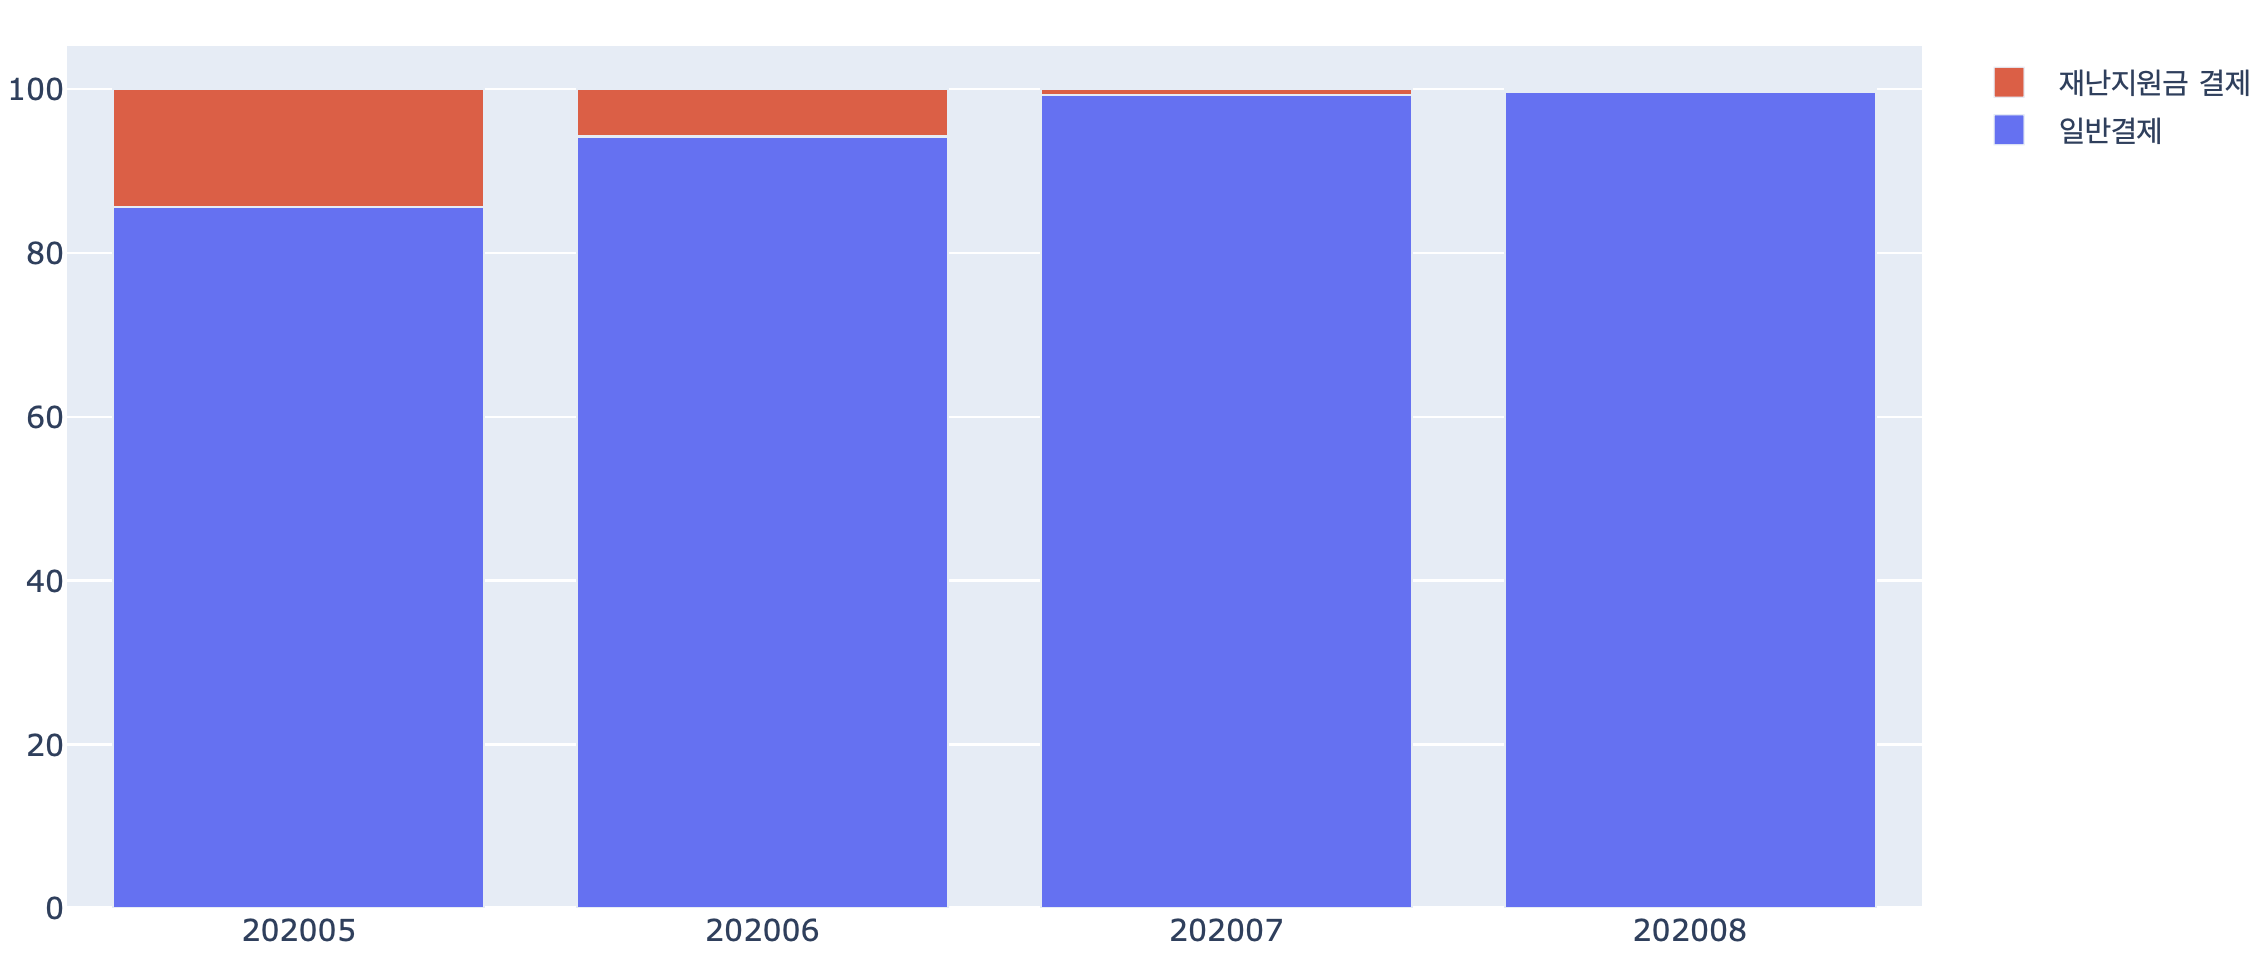

In [58]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/image1.png')
im1

### 산업별 재난지원금 1회 결제 시 소비금액 분석

- 산업별 재난 지원금 1회 결제 시 소비 금액을 분석한 결과 의류업에서 가장 큰 소비를 보이는 것으로 나타났고 그 다음으로는 숙박업, 음식점업, 교육업순인 것으로 분석됨

*대표값 선정 기준 = 결제 금액이 정규분포를 띄지 않았기 때문에 중앙값으로 설정

In [ ]:
c = df.copy()
c = c[(c['DisSpent'] != 0) & c['NumofDisSpent'] != 0]
c['DisSpent_once'] = c['DisSpent'] / c['NumofDisSpent']
c = c.groupby('중분류')['DisSpent_once'].median().to_frame().reset_index().sort_values(by='DisSpent_once',ascending=False)
fig = px.bar(c, x='중분류', y='DisSpent_once',color='DisSpent_once',title='산업별 재난지원금 1회 결제 시 소비 금액',
            labels={'DisSpent_once':'단위: 원'})
fig.show()

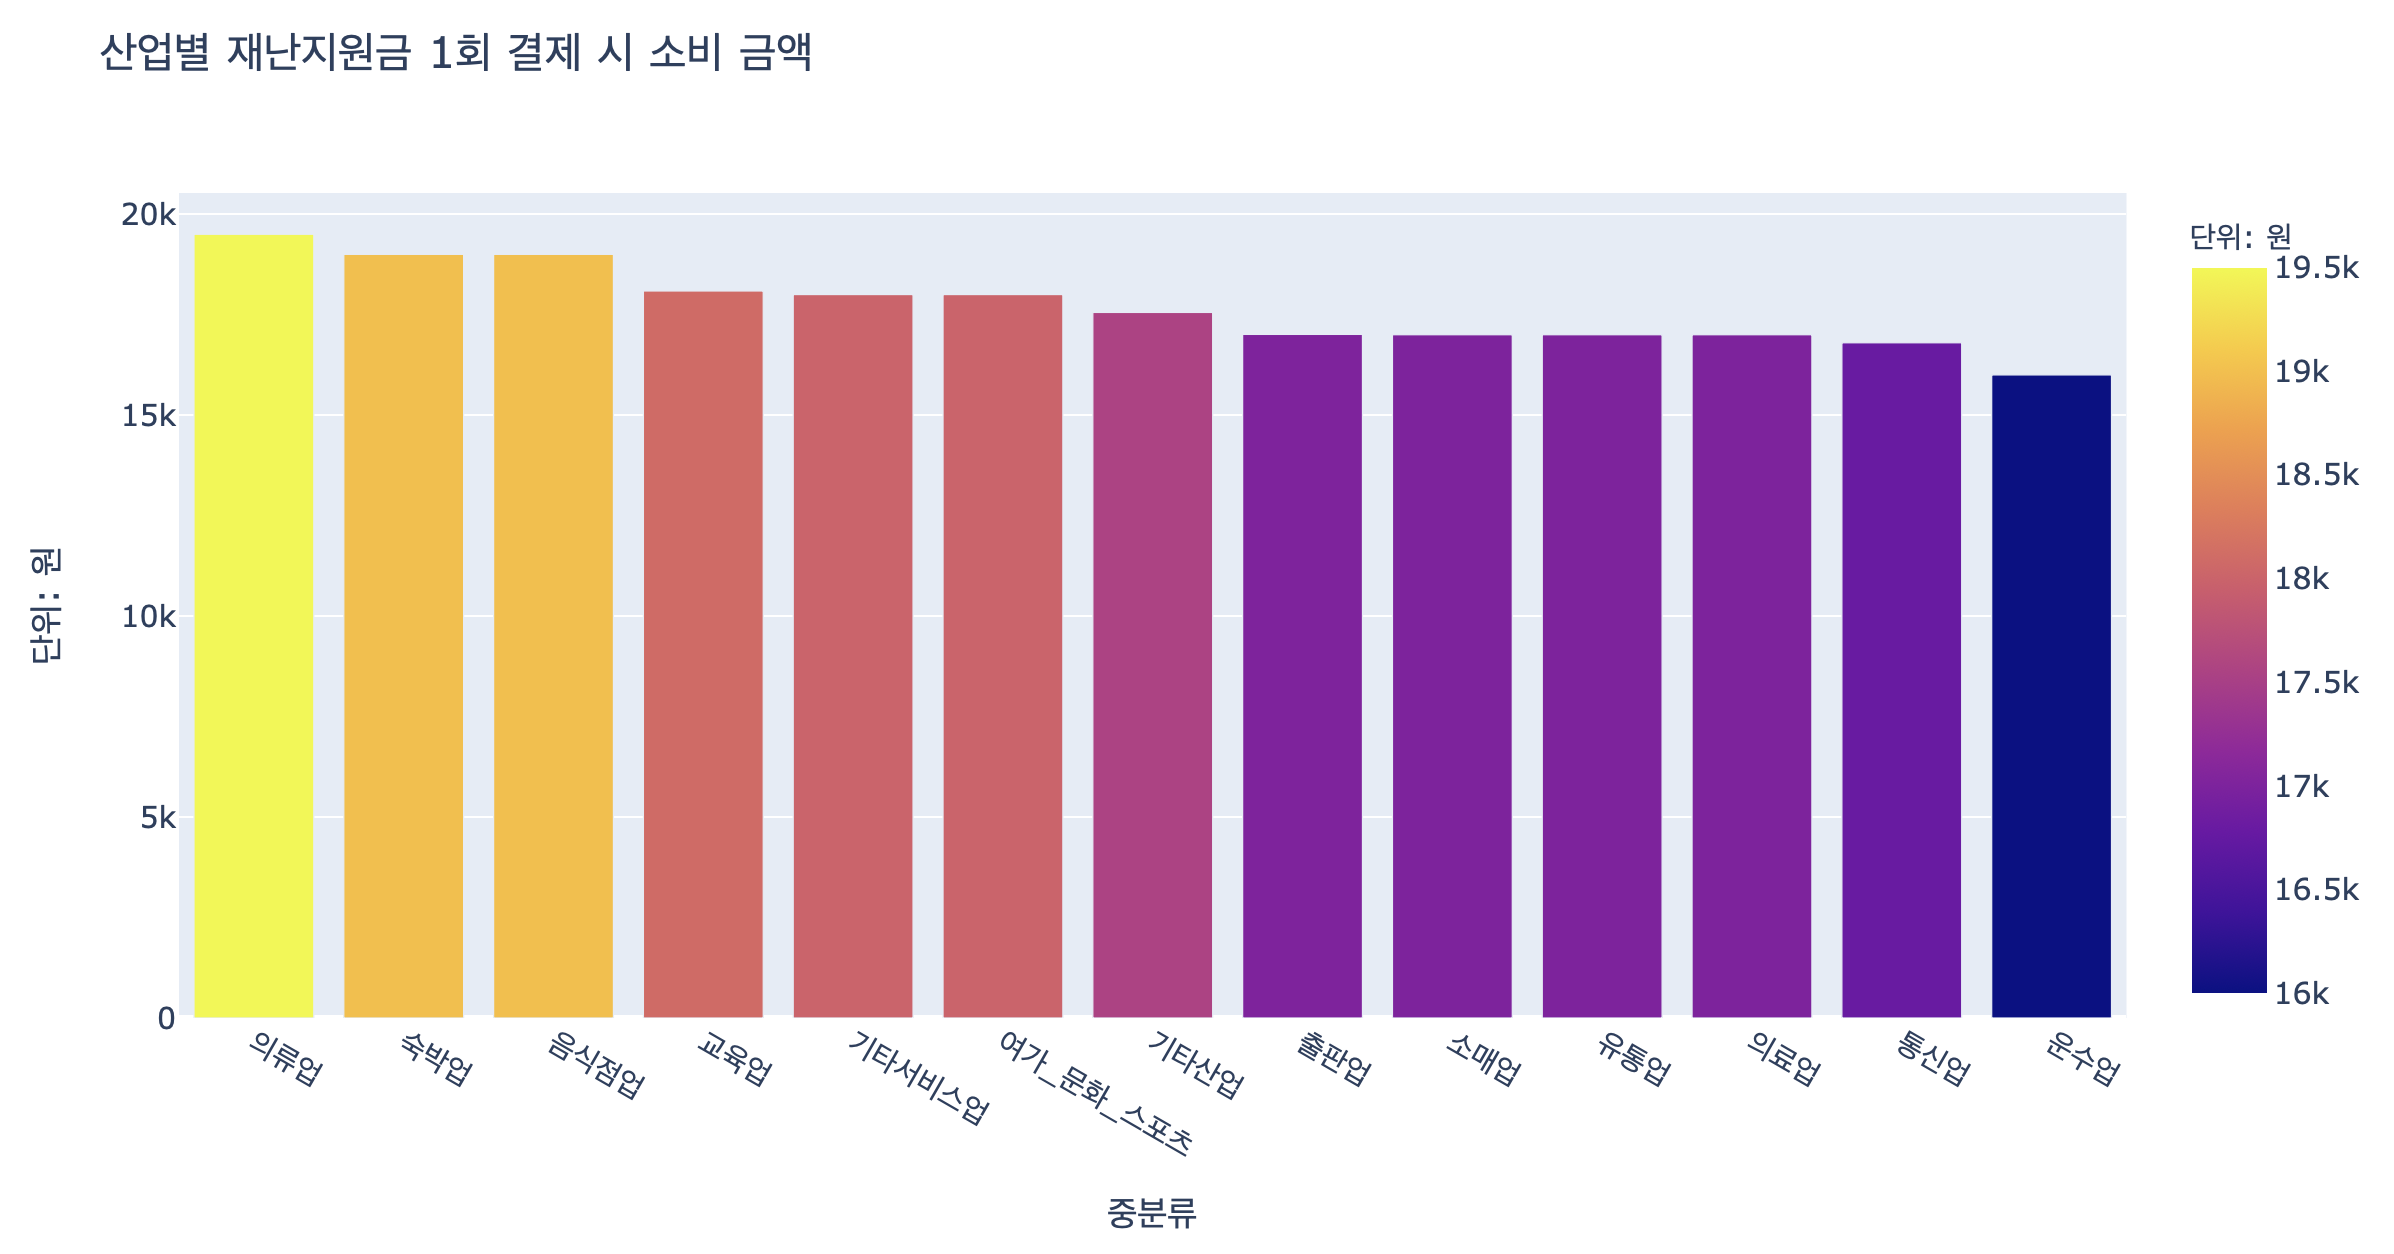

In [59]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.20.png')
im1

### 산업별 재난지원금 총 소비금액 분석

- 산업별 재난 지원금 총 소비 금액을 분석한 결과 음식점업에서 가장 많이 소비한 것으로 나타났고 그다음으로는 소매업, 여가.문화.스포츠업 순인 것으로 분석됨

In [ ]:
c = df.copy()
c = c.groupby('중분류')['GeneralSpent'].sum().to_frame().reset_index().sort_values(by='GeneralSpent',ascending=False)
c['GeneralSpent'] = c['GeneralSpent'] / 1000000000
c['GeneralSpent'] = c['GeneralSpent'].round(1)
fig = px.bar(c, x='중분류', y='GeneralSpent',color='GeneralSpent',title='산업별 재난지원금 총 소비 금액',
            labels={'GeneralSpent':'단위: 십억 원'})
fig.show()

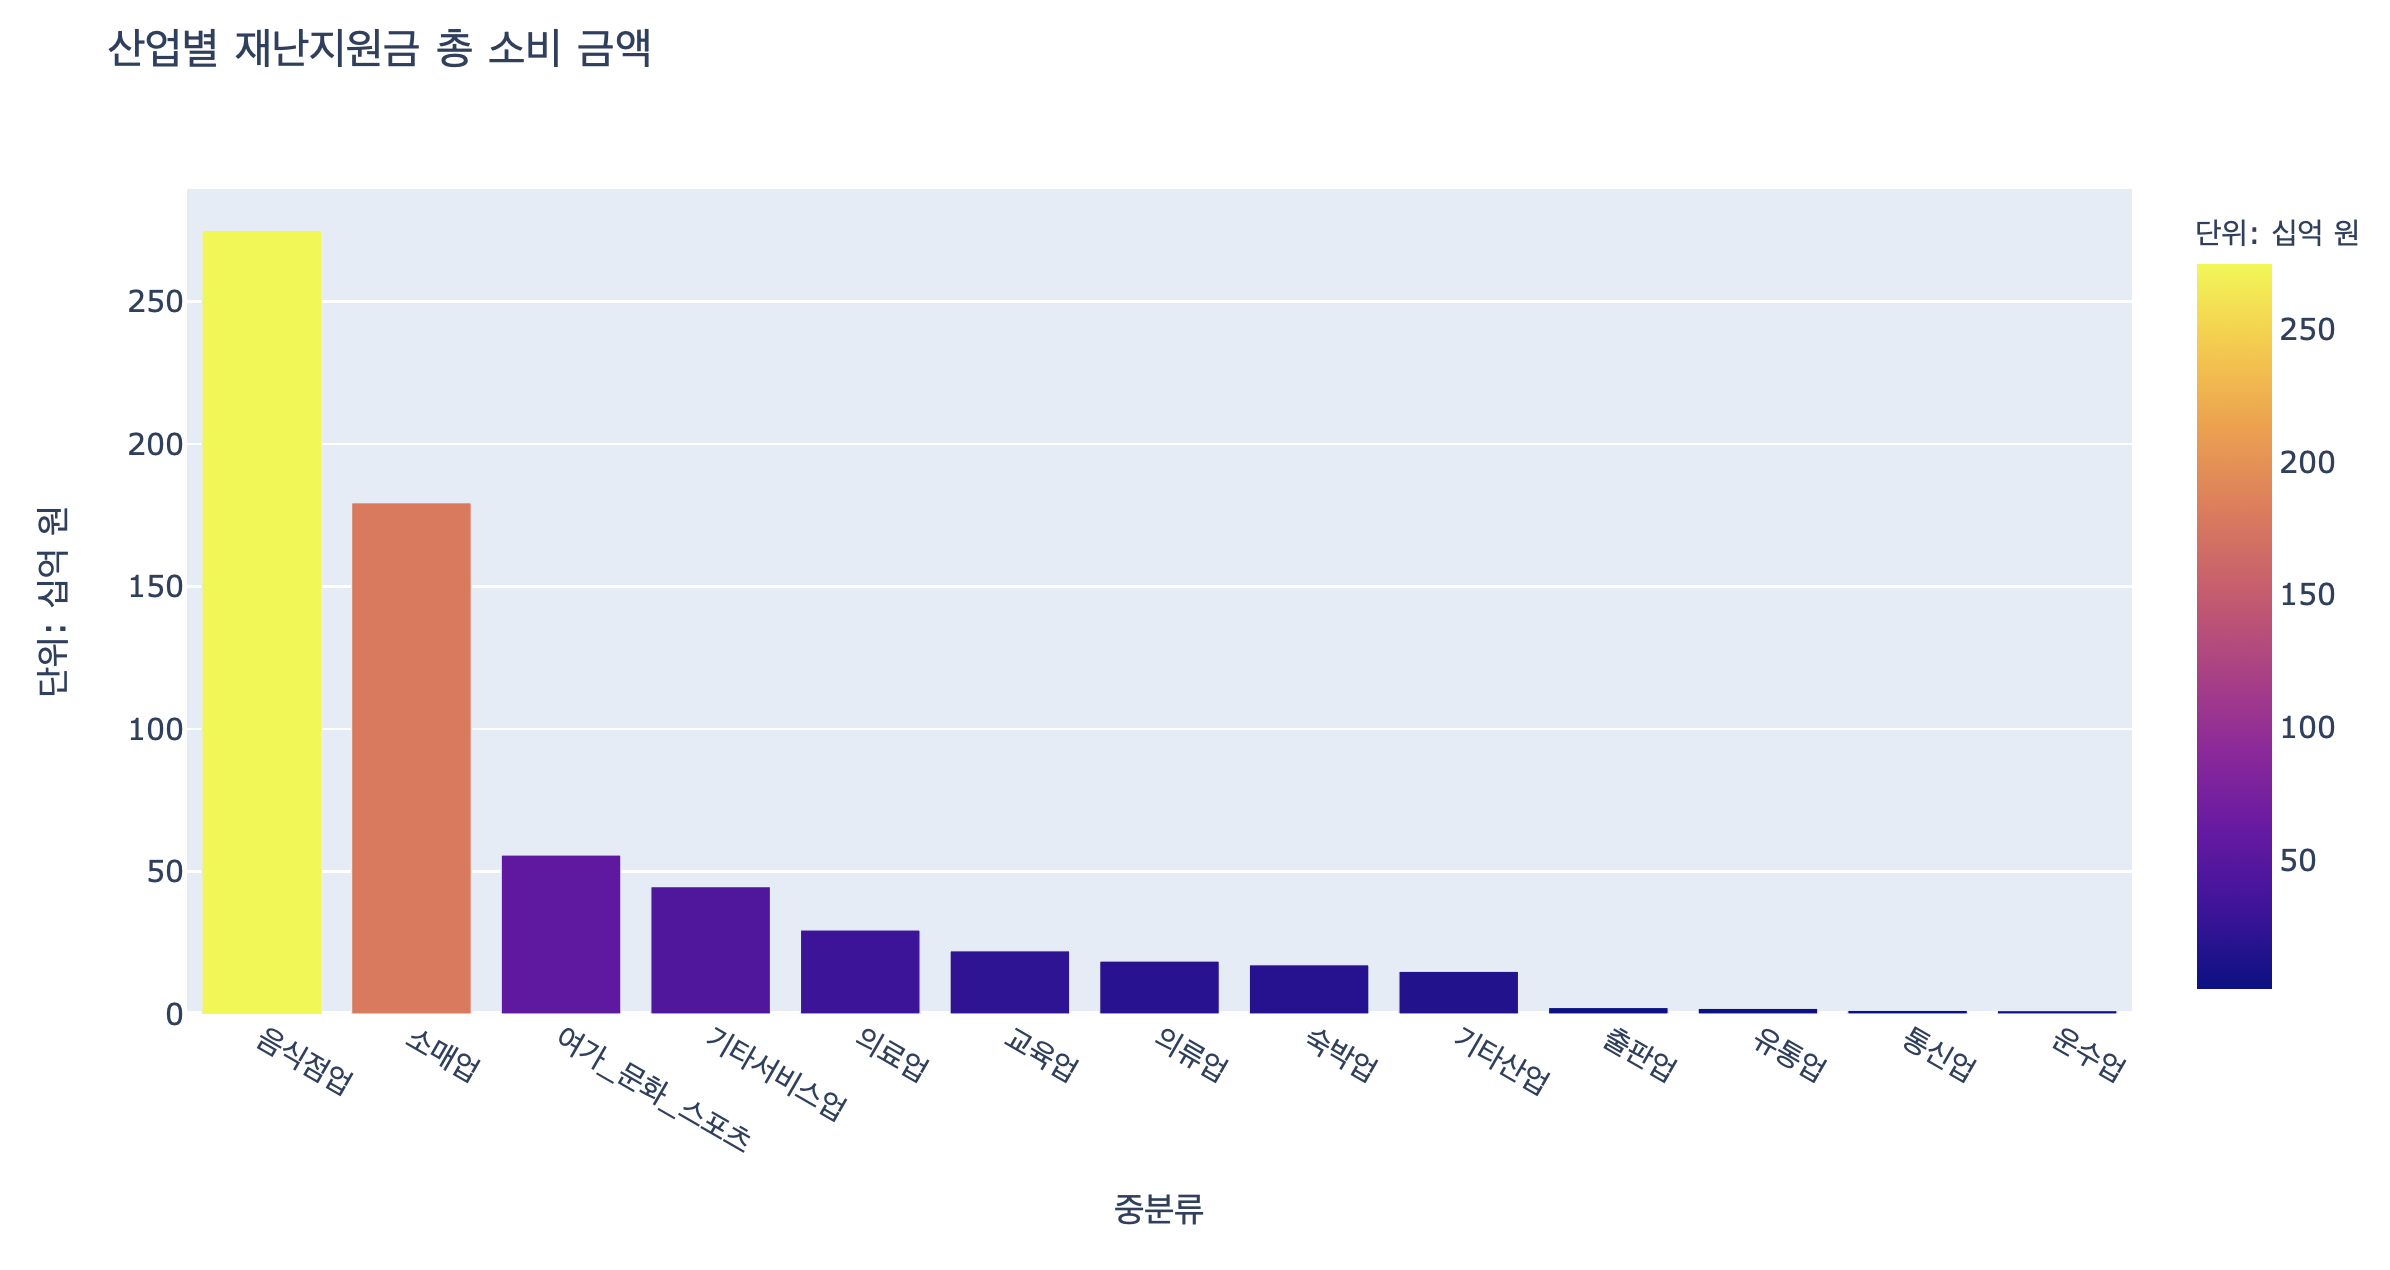

In [60]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.26.png')
im1

## Chapter2 각 산업별 재난 지원금 소비 추이 파악

- 재난 지원금을 가장 많이 사용한 상위 5개의 산업을 세분화하여 분석한 결과,<br><br>

- 음식점업 카테고리에 속해있는 업종의 재난 지원금 사용 비율을 분석한 결과 일반한식(58.4%) 업종에서 가장 많은 재난 지원금을 사용한 것으로 나타났고 서양음식(20.1%), 제과점(5.1%), 기타음료식품(4.5%), 일식회집(4.3%), 순인 것으로 분석됨<br><br>
- 소매업 카테고리에 속해있는 업종의 재난 지원금 사용 비율을 분석한 결과 편의점(33.8%) 업종에서 가장 많은 재난 지원금을 사용한 것으로 나타났고 스넥(13.1%), 슈퍼마켓(12.6%), 농축수산품(12.6%), 스포츠레져용품(8.1%), 순인 것으로 분석됨<br><br>
- 여가.문화.스포츠업 카테고리에 속해있는 업종의 재난 지원금 사용 비율을 분석한 결과 미용원(44.4%) 업종에서 가장 많은 재난 지원금을 사용한 것으로 나타났고 기타레져업(14.2%), 피부미용실(9.1%), 노래방(6.8%), 당구장(6.6%), 순인 것으로 분석됨<br><br>
- 기타 서비스업 카테고리에 속해있는 업종의 재난 지원금 사용 비율을 분석한 결과 주유소(25.3%) 업종에서 가장 많은 재난 지원금을 사용한 것으로 나타났고 자동차 정비(17.9%), 세탁소(17.1%), 가정용품수리(8.1%), 렌트카(6.7%), 순인 것으로 분석됨<br><br>
- 의료업 카테고리에 속해있는 업종의 재난 지원금 사용 비율을 분석한 결과 의원(31.5%) 업종에서 가장 많은 재난 지원금을 사용한 것으로 나타났고 약국(30.8%), 한의원(15.1%), 치과의원(13.1%), 동물병원(5.4%), 순인 것으로 분석됨<br><br>

In [ ]:
a = df[df['중분류'] == '음식점업'].groupby('소분류')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)
fig = px.pie(a, values='DisSpent', names='소분류')
fig.update_layout(
    title={
        'text': "음식점업 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

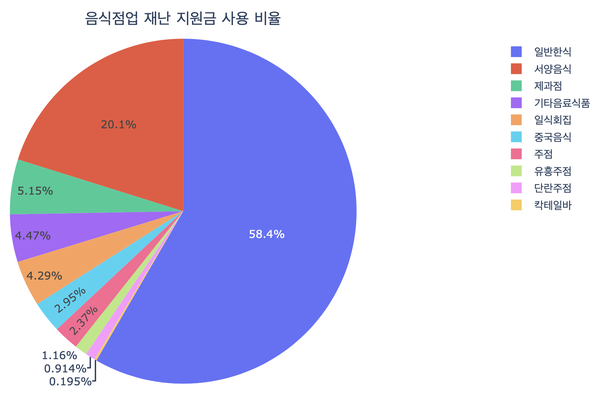

In [69]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.36.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류'] == '소매업'].groupby('소분류')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='소분류')
fig.update_layout(
    title={
        'text': "소매업 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

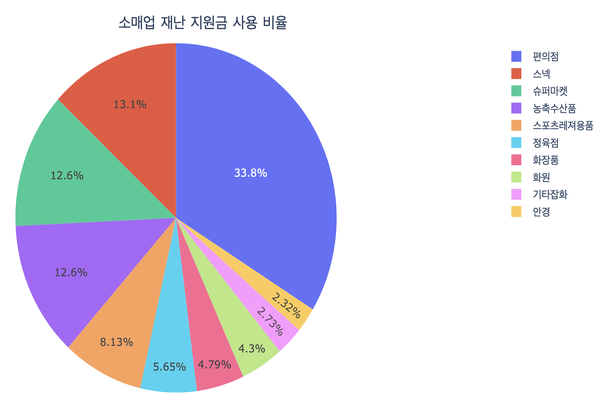

In [70]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.41.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류'] == '여가_문화_스포츠'].groupby('소분류')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='소분류')
fig.update_layout(
    title={
        'text': "여가.문화.스포츠업 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

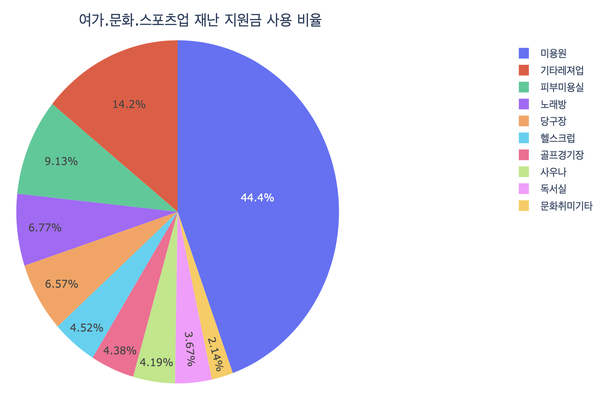

In [71]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.44.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류'] == '기타서비스업'].groupby('소분류')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='소분류')
fig.update_layout(
    title={
        'text': "기타 서비스업 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

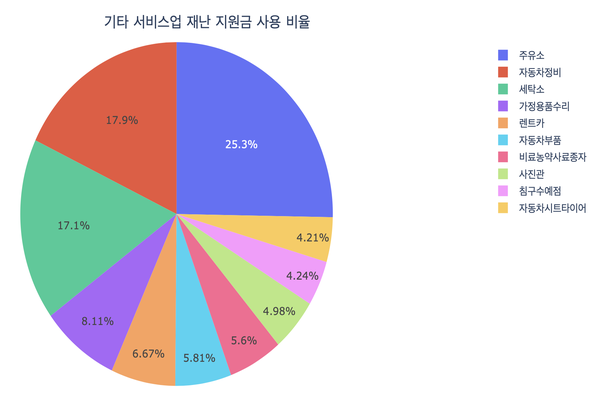

In [72]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.48.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류'] == '의료업'].groupby('소분류')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='소분류')
fig.update_layout(
    title={
        'text': "의료업 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

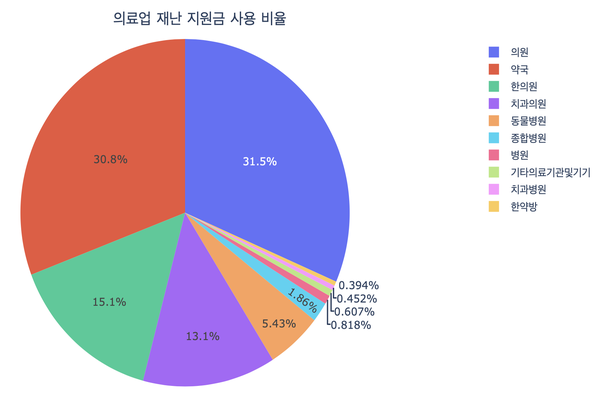

In [73]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/제주공간정보분석시각화/images/스크린샷 2020-12-31 오후 6.31.52.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

## Chapter3 제주시/서귀포시 재난지원금 소비 추이 비교 분석

### 제주시/서귀포시 재난 지원금 사용 금액 분석 

- 제주시와 서귀포시의 재난 지원금 사용금액을 비교 분석한 결과 약 350억 원의 재난지원금 중 74.4%의 재난 지원금이 제주시에서 사용되었고, 25.6%가 서귀포시에서 사용된 것으로 분석됨

In [25]:
a = df.groupby('SIGUNGU')['DisSpent'].sum().to_frame().reset_index()
fig = px.pie(a, values='DisSpent', names='SIGUNGU')
fig.update_layout(
    title={
        'text': "제주시/서귀포시 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

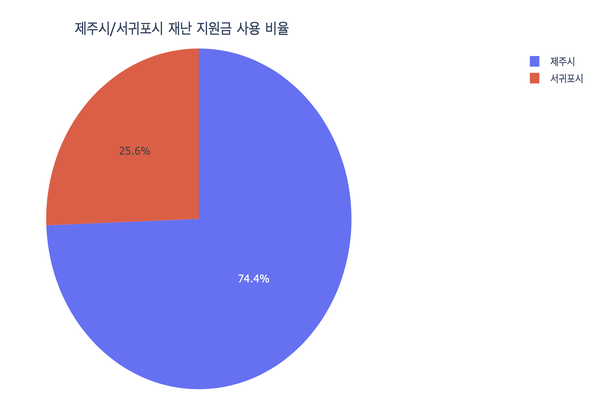

In [4]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.31.56.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 제주시 재난 지원금 총 소비금액 비교 및 산업별 재난 지원금 소비금액 비율 분석

- 본 분석에서는 제주시 안에 있는 읍.면 지역과 제주시 동지역을 비교 분석하기 위하여 제주시 안에 있는 동지역을 '제주시 동지역'으로 통합함<br>
    - 통합된 지역으로는 제주시동지역,애월읍,한림읍,조천읍,구좌읍, 한경면이 있다.

- 분석 결과 제주시 동지역에서 재난 지원금 사용금액은 전체에서 84.9%을 차지하는 것으로 나타났고, 애월읍 5.29%, 한림읍 3.74%순인 것으로 분석됨
- 읍면동별.산업별로 재난 지원금을 소비한 산업을 비율로 분석한 결과 제주시는 음식점업, 소매업, 여가.문화.스포츠업 순이였고<br>
애월읍의 경우 음식점업, 소매업, 기타 서비스업,<br>
조천읍의 경우 음식점업, 소매업, 기타 서비스업,<br>
한림읍의 경우 음식점업, 소매업, 여가.문화.스포츠업,<br>
구좌읍의 경우 음식점업, 소매업, 기타 서비스업,<br>
한경면의 경우 음식점업, 소매업, 기타 서비스업순인 것으로 분석됨

In [ ]:
a = df[df['SIGUNGU'] == '제주시'].groupby('EMD_NM2')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)
fig = px.pie(a, values='DisSpent', names='EMD_NM2')
fig.update_layout(
    title={
        'text': "제주시 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

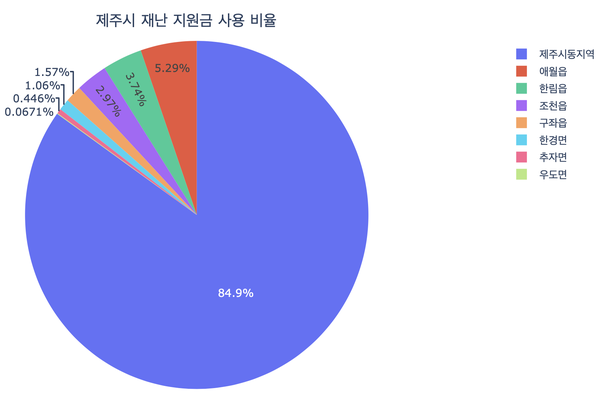

In [44]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.46.49.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town2, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "제주시 동지역 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.47.52.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town3, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "애월읍 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

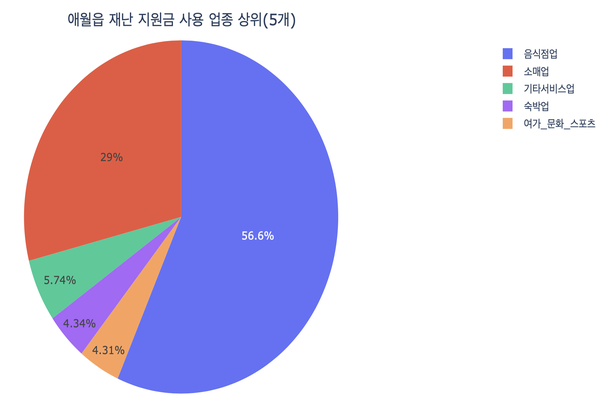

In [45]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.47.57.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town4, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "한림읍 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

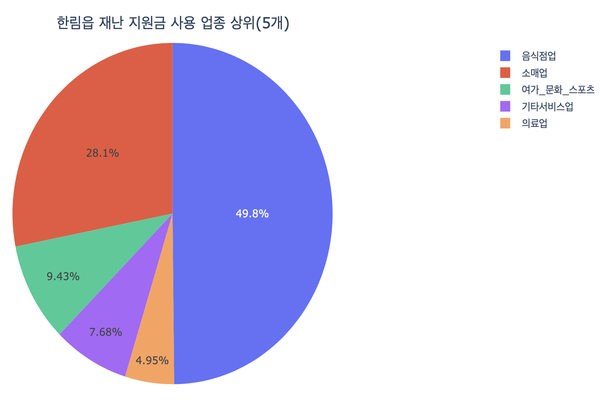

In [46]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.48.13.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town5, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "조천읍 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

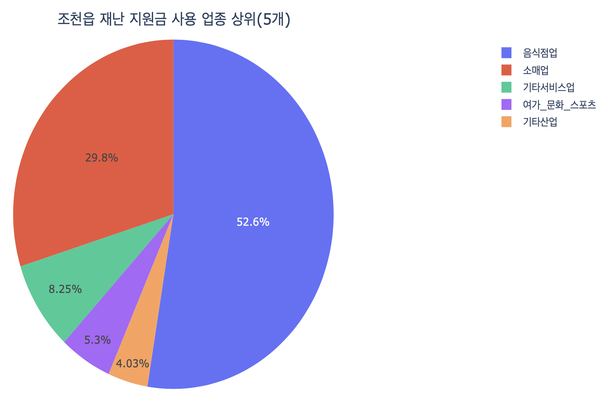

In [47]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.48.17.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town11, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "한경면 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

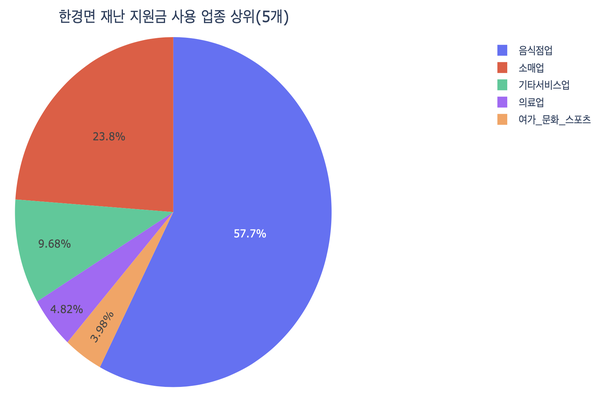

In [48]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.48.21.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town9, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "구좌읍 재난 지원금 사용 업종 상위(5개)",
        'y':0.94,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

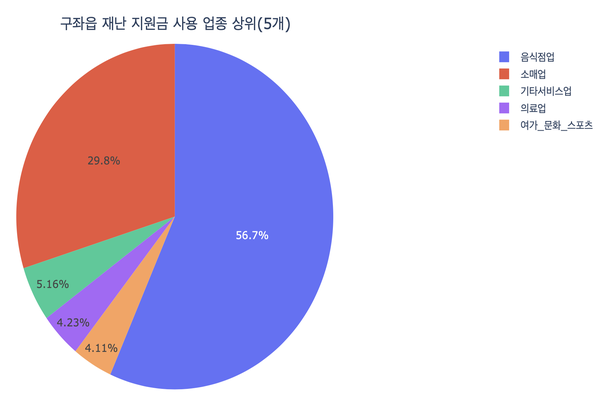

In [49]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.48.26.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 제주시 산업별 재난 지원금 사용 시간 분석

- 제주시의 재난 지원금을 사용한 시간을 상위 5개의 산업으로 분석한 결과 음식점업과 소매업의 경우 12시, 19시,
여가.문화.스포츠업 15시, 19시, 기타 서비스업 12시, 17시, 의료업 9시, 11시에 가장 많이 사용하는 것으로 분석됨

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '제주시') & (df['중분류'] == '음식점업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='제주시 음식점업 재난 소비금액 사용 시간')
fig.show()

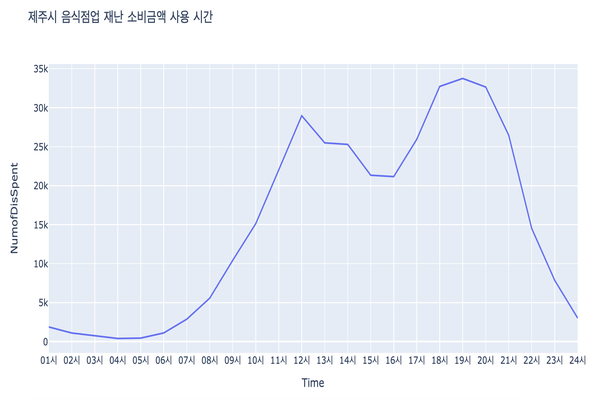

In [50]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.48.39.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '제주시') & (df['중분류'] == '소매업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='제주시 소매업 재난 소비금액 사용 시간')
fig.show()

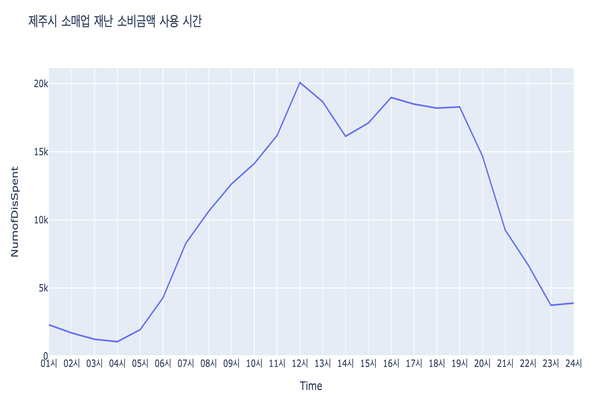

In [51]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.49.09.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '제주시') & (df['중분류'] == '여가_문화_스포츠')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='제주시 여가.문화.스포츠업 재난 소비금액 사용 시간')
fig.show()

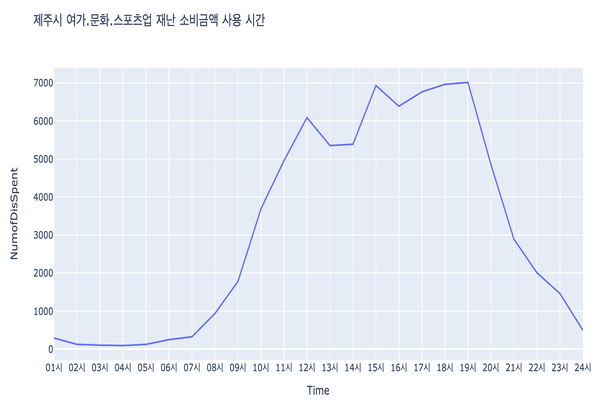

In [52]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.49.12.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '제주시') & (df['중분류'] == '기타서비스업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='제주시 기타 서비스업 재난 소비금액 사용 시간')
fig.show()

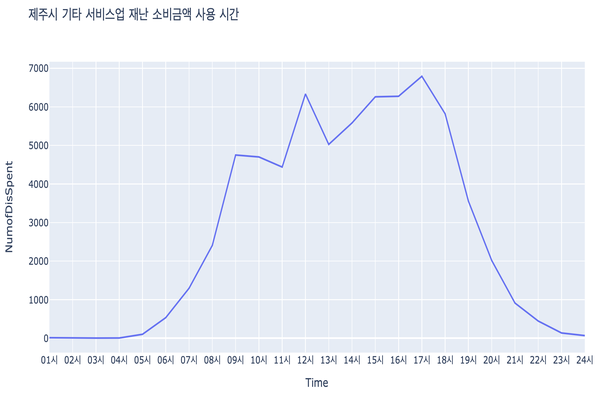

In [53]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.49.16.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '제주시') & (df['중분류'] == '의료업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='제주시 의료업 재난 소비금액 사용 시간')
fig.show()

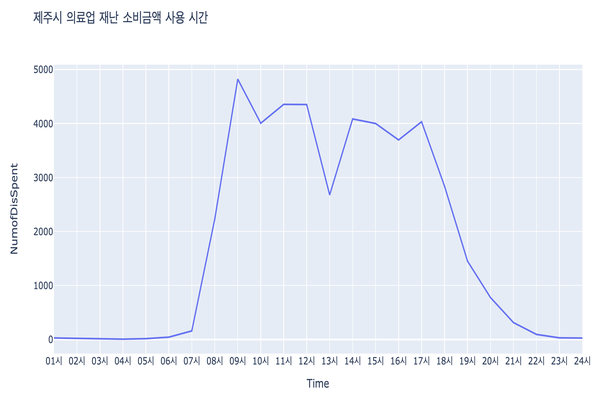

In [54]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.49.21.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 제주시 동별 재난 지원금 사용 금액 분석

- 제주시 동지역에서 사용한 재난 지원금의 비율을 동별로 분석한 결과 노형동(21.6%)에서 가장 많은 재난 지원금이 사용되었고, 연동(16%), 이도이동(14.8%), 일도이동(12.7%), 일도일동(8%)순인 것으로 분석됨

In [ ]:
a = df[df['EMD_NM2'] == '제주시동지역'].groupby('EMD_NM')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='EMD_NM')
fig.update_layout(
    title={
        'text': "제주시 동지역 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

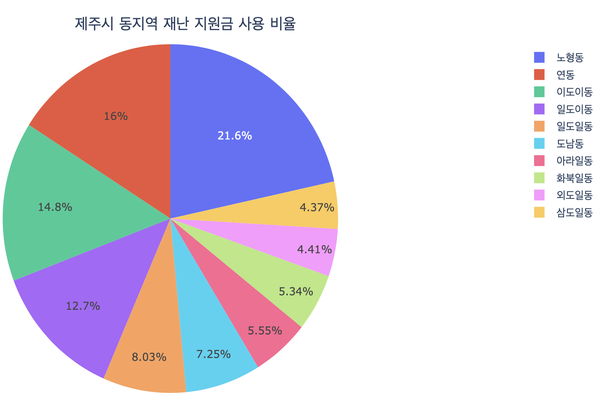

In [55]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.37.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 서귀포시 재난 지원금 총 소비금액 비교 및 산업별 재난 지원금 소비금액 비율 분석
- 본 분석에서는 서귀포시 안에 있는 읍.면 지역과 서귀포시 동지역을 비교 분석하기 위하여 서귀포시 안에 있는 동지역을 '서귀포시 동지역'으로 통합함<br>
    - 통합된 지역으로는 서귀포시동지역,대정읍, 안덕면, 표선면, 성산읍, 남원읍이 있다.

- 분석 결과 서귀포시 동지역에서 재난 지원금 사용금액은 전체에서 62.7%을 차지하는 것으로 나타났고, 대정읍 10.8%, 성산읍 8%순인 것으로 분석됨
- 읍면동별.산업별로 재난 지원금을 소비한 산업을 비율로 분석한 결과 서귀포시는 음식점업, 소매업, 여가.문화.스포츠업 순이였고<br>
대정읍의 경우 음식점업, 소매업, 기타 서비스업,<br>
안덕면의 경우 음식점업, 소매업, 기타 서비스업,<br>
표선면의 경우 음식점업, 소매업, 의료업,<br>
성산읍의 경우 음식점업, 소매업, 기타 서비스업,<br>
남원읍의 경우 음식점업, 소매업, 여가.문화.스포츠업인 것으로 분석됨

In [ ]:
a = df[df['SIGUNGU'] == '서귀포시'].groupby('EMD_NM2')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)
fig = px.pie(a, values='DisSpent', names='EMD_NM2')
fig.update_layout(
    title={
        'text': "서귀포시 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

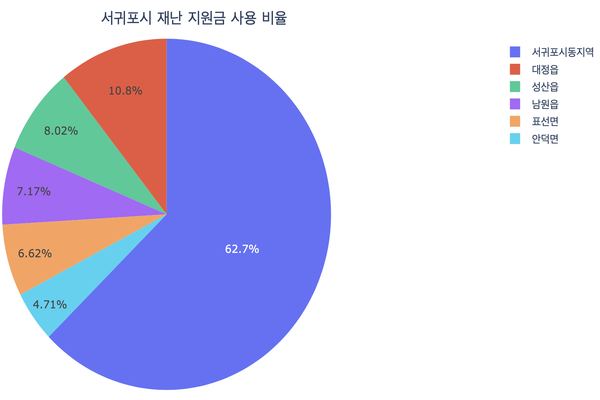

In [56]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.41.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town2, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "서귀포시 동지역 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

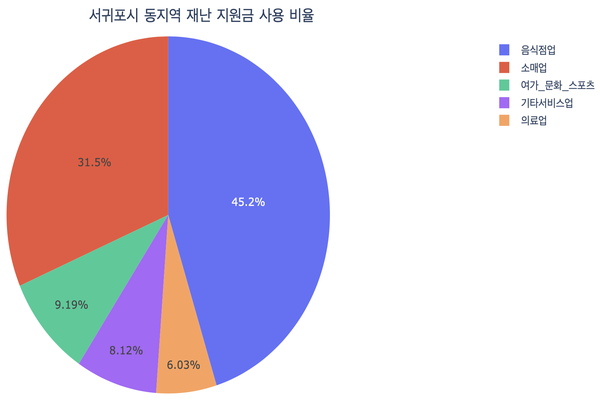

In [57]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.46.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town7, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "대정읍 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

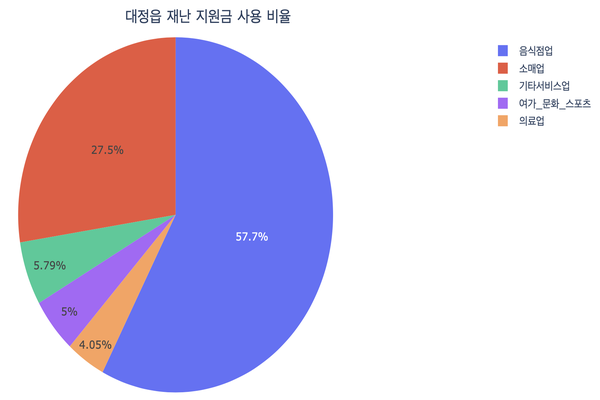

In [58]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.50.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town8, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "안덕면 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

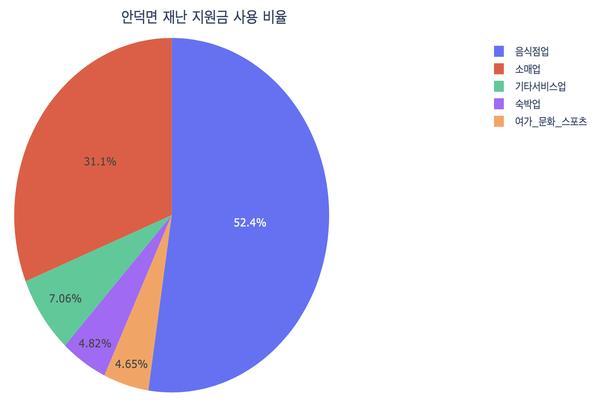

In [59]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.53.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town10, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "표선면 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

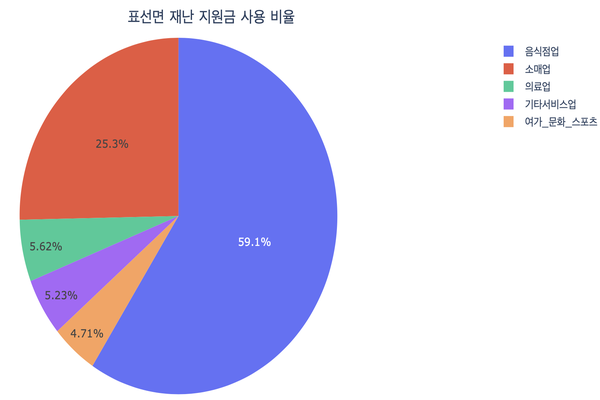

In [60]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.53.57.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town6, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "성산읍 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

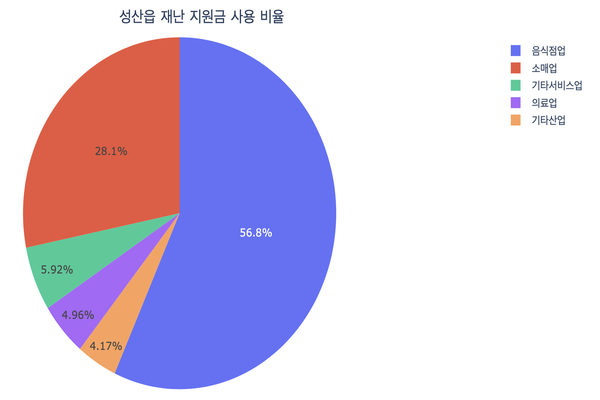

In [61]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.54.00.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
fig = px.pie(town12, values='DisSpent', names='중분류')
fig.update_layout(
    title={
        'text': "남원읍 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

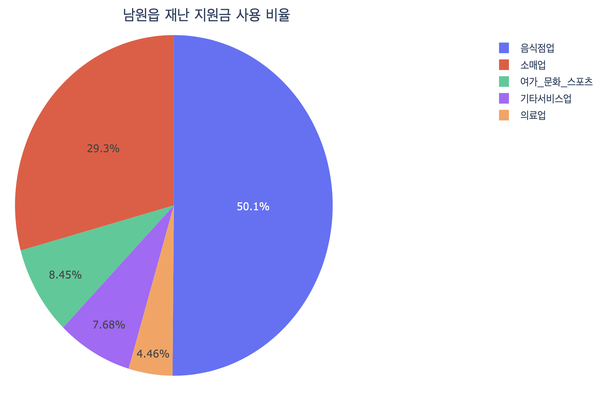

In [62]:
im1 = Image.open('/Users/gimginam/Desktop/스크린샷 2020-12-31 오후 7.54.04.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 서귀포시 산업별 재난 지원금 사용 시간 분석

- 서귀포시의 재난 지원금을 사용한 시간을 상위 5개의 산업으로 분석한 결과 음식점업의 경우 12시와 19시,
소매업과 여가.문화.스포츠업 12시, 18시,
기타 서비스업 10시, 12시, 의료업 12시, 16시에 가장 많이 사용하는 것으로 분석됨

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '서귀포시') & (df['중분류'] == '음식점업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='서귀포시 음식점업 재난 소비금액 사용 시간')
fig.show()

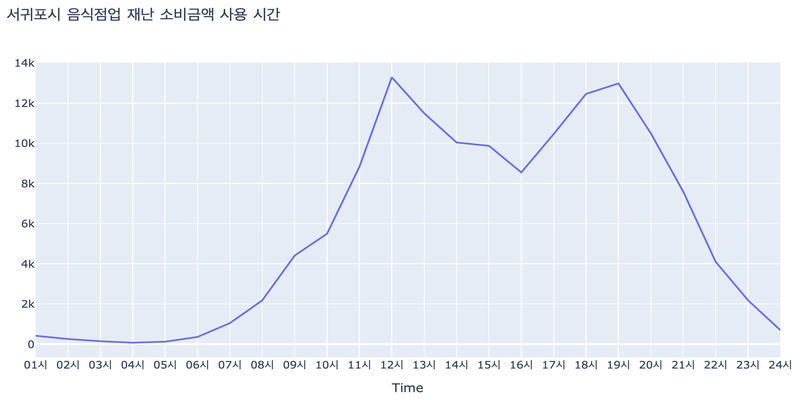

In [67]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.32.29.png')
new_width  = 800
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '서귀포시') & (df['중분류'] == '소매업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='서귀포시 소매업 재난 소비금액 사용 시간')
fig.show()

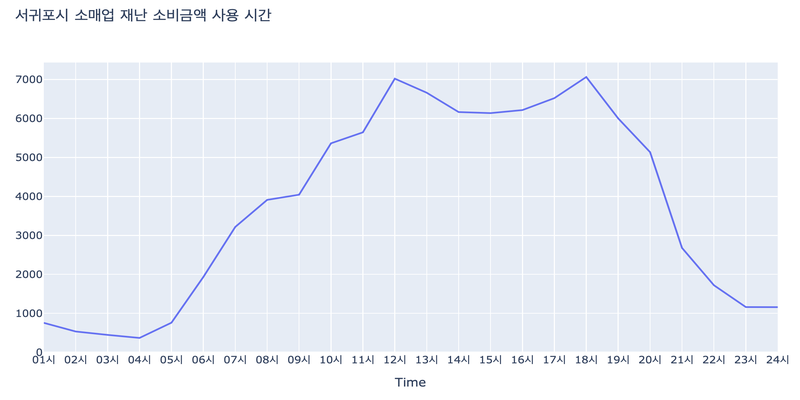

In [68]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.32.33.png')
new_width  = 800
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '서귀포시') & (df['중분류'] == '여가_문화_스포츠')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='서귀포시 여가.문화.스포츠업 재난 소비금액 사용 시간')
fig.show()

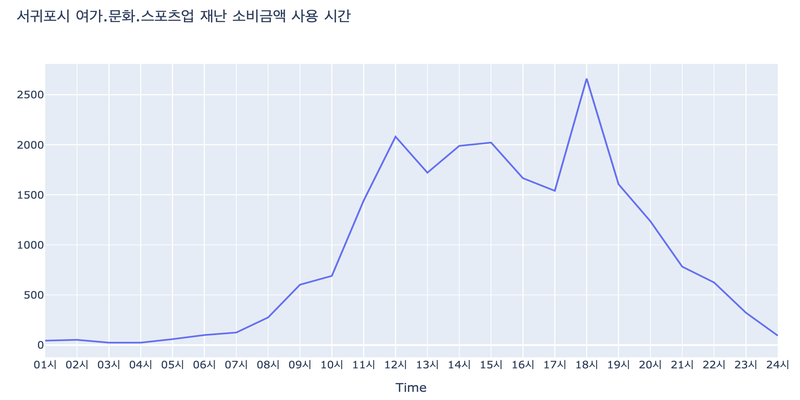

In [69]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.32.37.png')
new_width  = 800
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '서귀포시') & (df['중분류'] == '기타서비스업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='서귀포시 기타 서비스업 재난 소비금액 사용 시간')
fig.show()

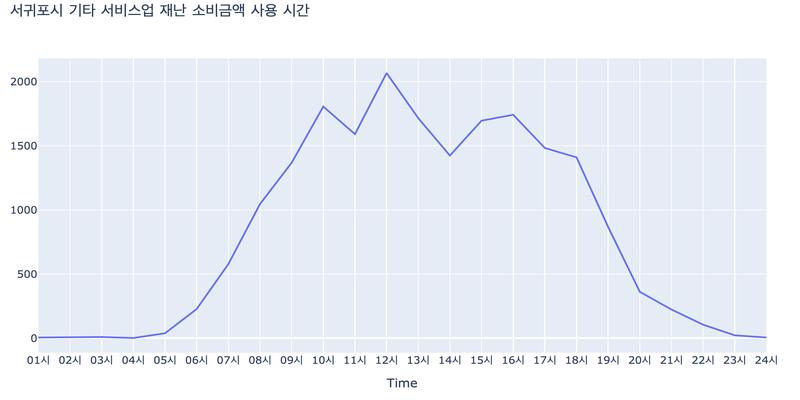

In [70]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.32.40.png')
new_width  = 800
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[(df['Time'] != 'x시') & (df['SIGUNGU'] == '서귀포시') & (df['중분류'] == '의료업')].groupby(['중분류','Time'])['NumofDisSpent'].sum().to_frame().reset_index()
a.loc[a['Time'] == '00시','Time'] = '24시'
a.sort_values(by='Time',ascending=True,inplace=True)
fig = px.line(a, x="Time", y="NumofDisSpent", title='서귀포시 의료업 재난 소비금액 사용 시간')
fig.show()

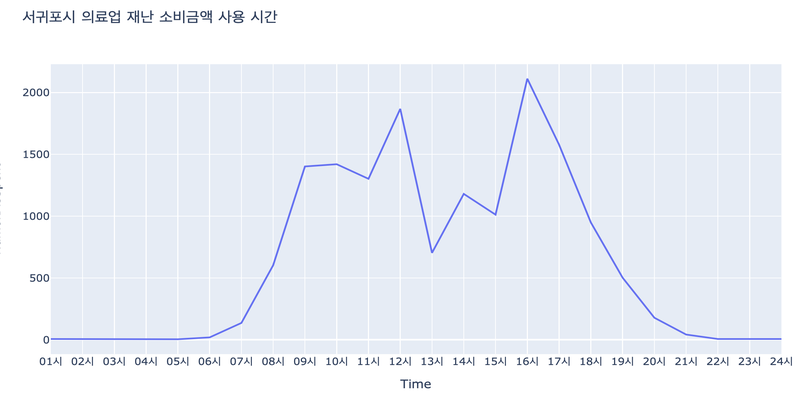

In [71]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.32.53.png')
new_width  = 800
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

### 서귀포시 동별 재난 지원금 사용 금액 분석

- 서귀포시 동지역에서 사용한 재난 지원금의 비율을 동별로 분석한 결과 서귀동(28%)에서 가장 많은 재난 지원금이 사용되었고, 동홍동(22.5%), 중문동(9.7%), 토평동(9%), 강정동(8.8%)순인 것으로 분석됨

In [ ]:
a = df[df['EMD_NM2'] == '서귀포시동지역'].groupby('EMD_NM')['DisSpent'].sum().to_frame().reset_index().sort_values(by='DisSpent',ascending=False)[:10]
fig = px.pie(a, values='DisSpent', names='EMD_NM')
fig.update_layout(
    title={
        'text': "서귀포시 동지역 재난 지원금 사용 비율",
        'y':0.94,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

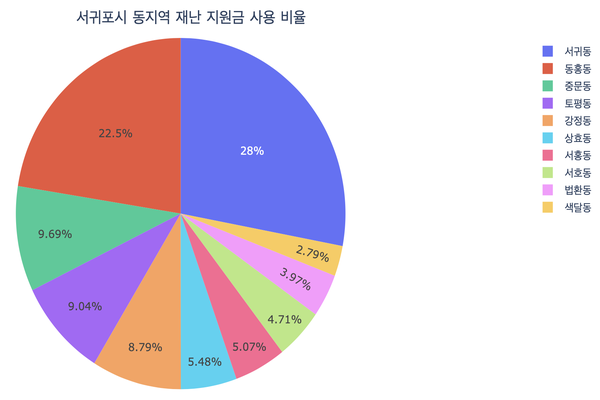

In [73]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.07.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

## Chapter4 산업별 재난 지원금 사용업소/미사용 업소 비율 분석

- 본 분석에서는 재난 지원금 사용 금액이 가장 많은 5개의 산업에서 재난 지원금을 사용한 업소와 그렇지 않은 업소의 비율을 분석함<br><br>
**본 분석에서는 업소등급,업종명, 위.경도로 중복되는 업소를 중복 업소라고 판단하여 이를 제외한 나머지 업소를 분석에 활용함<br><br>
- 총 105,847개의 음식점업 업소 중 13.8%의 업소에서 재난 지원금이 결제되었고 86.2%의 업소는 재난 지원금이 한번도 결제되지 않은 것으로 분석됨<br><br>
- 총 144,169개의 소매업 업소 중 20.4%의 업소에서 재난 지원금이 결제되었고 79.6%의 업소는 재난 지원금이 한번도 결제되지 않은 것으로 분석됨<br><br>
- 총 54,467개의 여가.문화.스포츠업 업소 중 21%의 업소에서 재난 지원금이 결제되었고 79%의 업소는 재난 지원금이 한번도 결제되지 않은 것으로 분석됨<br><br>
- 총 55,544개의 기타 서비스업 업소 중 24.9%의 업소에서 재난 지원금이 결제되었고 75.1%의 업소는 재난 지원금이 한번도 결제되지 않은 것으로 분석됨<br><br>
- 총 31,837개의 의료업 업소 중 22.5%의 업소에서 재난 지원금이 결제되었고 77.5%의 업소는 재난 지원금이 한번도 결제되지 않은 것으로 분석됨<br><br>

In [ ]:
a = df[df['중분류']=='음식점업'].drop_duplicates(subset=['FranClass','소분류','POINT_X2','POINT_Y2'], keep='last')
b = a['YM'].count() - a[(a['NumofDisSpent'] != 0)]['YM'].count()
c = a[(a['NumofDisSpent'] != 0)]['YM'].count()
labels = ['재난 지원금 미사용업소','재난 지원금 사용업소']
values = [b, c]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': "음식점업 재난 지원금 사용 업소 비율",
        'y':0.86,
        'x':0.44,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

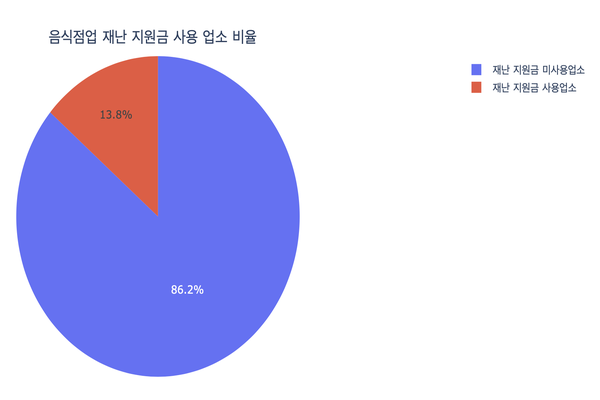

In [80]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.10.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류']=='소매업'].drop_duplicates(subset=['FranClass','소분류','POINT_X2','POINT_Y2'], keep='last')
b = a['YM'].count() - a[(a['NumofDisSpent'] != 0)]['YM'].count()
c = a[(a['NumofDisSpent'] != 0)]['YM'].count()
labels = ['재난 지원금 미사용업소','재난 지원금 사용업소']
values = [b, c]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': "소매업 재난 지원금 사용 업소 비율",
        'y':0.86,
        'x':0.44,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

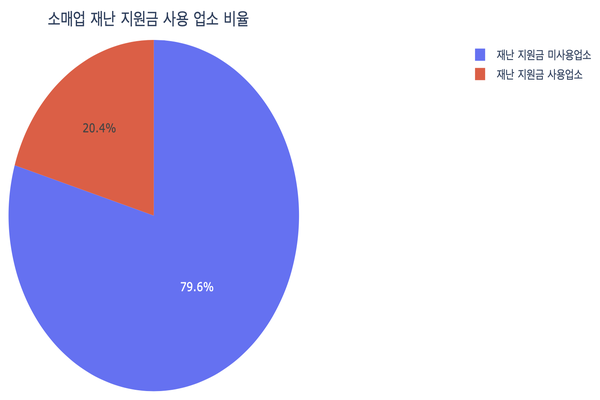

In [81]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.13.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류']=='여가_문화_스포츠'].drop_duplicates(subset=['FranClass','소분류','POINT_X2','POINT_Y2'], keep='last')
b = a['YM'].count() - a[(a['NumofDisSpent'] != 0)]['YM'].count()
c = a[(a['NumofDisSpent'] != 0)]['YM'].count()
labels = ['재난 지원금 미사용업소','재난 지원금 사용업소']
values = [b, c]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': "여가.문화.스포츠업 재난 지원금 사용 업소 비율",
        'y':0.86,
        'x':0.44,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

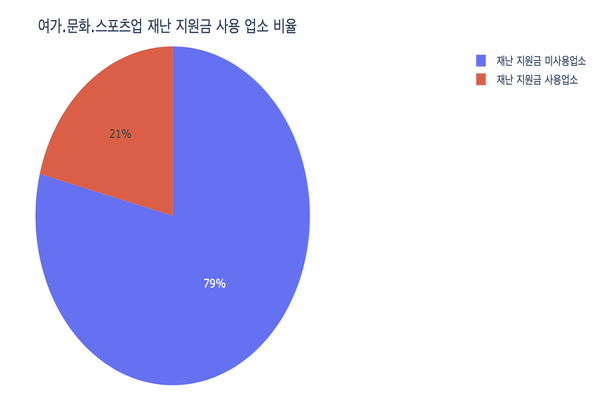

In [82]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.16.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류']=='기타서비스업'].drop_duplicates(subset=['FranClass','소분류','POINT_X2','POINT_Y2'], keep='last')
b = a['YM'].count() - a[(a['NumofDisSpent'] != 0)]['YM'].count()
c = a[(a['NumofDisSpent'] != 0)]['YM'].count()
labels = ['재난 지원금 미사용업소','재난 지원금 사용업소']
values = [b, c]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': "기타 서비스업 재난 지원금 사용 업소 비율",
        'y':0.86,
        'x':0.44,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

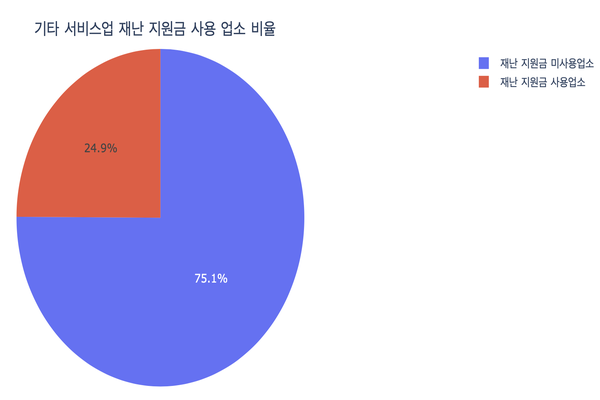

In [83]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.25.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

In [ ]:
a = df[df['중분류']=='의료업'].drop_duplicates(subset=['FranClass','소분류','POINT_X2','POINT_Y2'], keep='last')
b = a['YM'].count() - a[(a['NumofDisSpent'] != 0)]['YM'].count()
c = a[(a['NumofDisSpent'] != 0)]['YM'].count()
labels = ['재난 지원금 미사용업소','재난 지원금 사용업소']
values = [b, c]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': "의료업 재난 지원금 사용 업소 비율",
        'y':0.86,
        'x':0.44,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

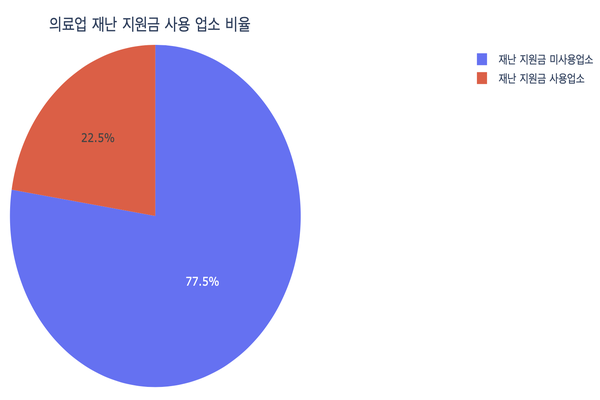

In [84]:
im1 = Image.open('/Users/gimginam/Downloads/ipynb_code/Dacon/images/스크린샷 2020-12-31 오후 6.33.30.png')
new_width  = 600
new_height = 400
im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
im1

# 참고 자료

- https://dacon.io/competitions/official/235682/codeshare/2021?page=1&dtype=recent&ptype=pub